In [27]:
#  Here is some Fourier Filte
# fft fun -- For Jeremy Chan -- Reading in a CSV of wind speed, plotting and Fourier transforming.

In [96]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import cm
import numpy as np
import os
import scipy.io
import seaborn as sb
from scipy.fftpack import fft
import csv
import pandas as pd
from scipy.signal import butter, filtfilt
import glob
from matplotlib import style
style.use("seaborn-poster")

In [40]:
# # Read in the data from a CSV file
# outpath = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Method_Fig/'
# WindData = pd.read_csv(outpath + 'Final_position_centroid_method_FirstTrial_L0.1_c-3_m12.csv')
# last_trial = pd.read_csv(outpath + 'Final_position_centroid_method_LastTrial_L0.1_c-3_m12.csv')

In [3]:
# Read in the data from a CSV file
outpath = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Centroids_Final'
# csv_list = glob.glob(outpath + '*Trial*.csv')
# for element in csv_list:
#     print(element)
# csv_Last_list = pd.read_csv(outpath + ' *Raw*.csv')
WindData = pd.read_csv(outpath + '\Centroids_Final_Experimental_2_16721.csv')
last_trial = pd.read_csv(outpath + '\Centroids_Final_Experimental_2_50448.csv')
WindData_ = pd.read_csv(outpath + '\Centroids_Final_Sham_2_46690.csv')
last_trial_ = pd.read_csv(outpath + '\Centroids_Final_Sham_2_63666.csv')

In [4]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [5]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [ ]:
def butter_bandstop(fs, order=5):
    nyq = 0.5 * fs
    low = 22 / nyq
    high = 28 / nyq
    b, a = butter(order, [low, high], btype='bandstop', analog=False)
    return b, a

def butter_bandstop_filter(data, fs, order=5):
    b, a = butter_bandstop(fs, order=order)
    y = filtfilt(b, a, data, padlen = 2 * max(len(a), len(b)))
    return y

In [6]:
def Tortuosity(df):
    
    pre_t = df.loc[:,'FrameNumber']
    t = pre_t/100
    xvel = df.loc[:,'X_position']
    yvel = df.loc[:,'Y_position']
    
    Nx = len(xvel)  #number of points
    Nt = Nx
    Time = t.values[-1]-t.values[0]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
    list(xvel)
    meanxvel = mean(xvel)
    
    # . fftxvel is complex with real and imaginary part.
    #Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
    fftxvel = fft(xvel-meanxvel)    # this is the Fourier tranform of the x velocity
    xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  
    
    order = 5
    cutoff = 5
    
    pre_conditioned_xvel = butter_bandstop_filter(xvel, fs, order)
    
    conditioned_xvel = butter_highpass_filter(pre_conditioned_xvel, cutoff, fs, order)

    
    stdxv = np.std(conditioned_xvel)
    meanxv = np.mean(xvel)
    turb_intens = stdxv/meanxv
    
    fft_Cxvel = fft(conditioned_xvel)
    
    return xf, Nx, fft_Cxvel, stdxv, meanxv, turb_intens, conditioned_xvel

In [ ]:
# outpath = '/Users/Mahad/Documents/GitHub2/ManducaMultiSenseFeeding/Method_Fig/'
# csv_list = glob.glob(outpath + '*Trial*.csv')

In [7]:
# just making sure the data are read in
WindData_.tail() , last_trial_.tail() 

(     Unnamed: 0  FrameNumber          Name  X_position  Y_position  \
 282         282        46972  Sham_2_46690  221.881824  414.789273   
 283         283        46973  Sham_2_46690  263.752593  347.497603   
 284         284        46974  Sham_2_46690  288.239377  281.233092   
 285         285        46975  Sham_2_46690  292.388049  251.310523   
 286         286        46976  Sham_2_46690  191.208126  170.031018   
 
      visit_number  
 282             0  
 283             0  
 284             0  
 285             0  
 286             0  ,
      Unnamed: 0  FrameNumber          Name  X_position  Y_position  \
 104         104        63770  Sham_2_63666  400.091274  362.663163   
 105         105        63771  Sham_2_63666  401.551523  363.296068   
 106         106        63772  Sham_2_63666  377.405521  329.148471   
 107         107        63773  Sham_2_63666  358.743853  327.006139   
 108         108        63774  Sham_2_63666  237.890915  212.115523   
 
      visit_numbe

In [8]:
np.where(last_trial.X_position.isnull())
# np.where(WindData_.X_position.isnull())

(array([], dtype=int64),)

In [9]:
WindData = WindData.loc[:, :]
last_trial = last_trial.loc[:,:]
WindData_ = WindData_.loc[:, :]
last_trial_ = last_trial_.loc[:, :]

In [12]:
#High light
xf_first, Nx_first, fft_Cxvel_first, stdxv_first, meanxv_first, turb_intens_first, x_cond_first  = Tortuosity(WindData)
xf_last, Nx_last, fft_Cxvel_last, stdxv_last, meanxv_last, turb_intens_last, x_cond_last = Tortuosity(last_trial)
print(stdxv_first, meanxv_first, turb_intens_first)
print(stdxv_last, meanxv_last, turb_intens_last)

4.987694268114512 280.2523873653562 0.017797151756684993
17.887001124097935 238.29859498843427 0.0750612949479038


C:\Users\Daniellab\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [13]:
#Low light
xf_first_, Nx_first_, fft_Cxvel_first_, stdxv_first_, meanxv_first_, turb_intens_first_, x_cond_first_  = Tortuosity(WindData_)
xf_last_, Nx_last_, fft_Cxvel_last_, stdxv_last_, meanxv_last_, turb_intens_last_, x_cond_last_ = Tortuosity(last_trial_)
print(stdxv_first_, meanxv_first_, turb_intens_first_)
print(stdxv_last_, meanxv_last_, turb_intens_last_)

20.381110840309056 208.3856858172423 0.09780475448867265
23.59736775719609 464.5269035007878 0.0507987106437982


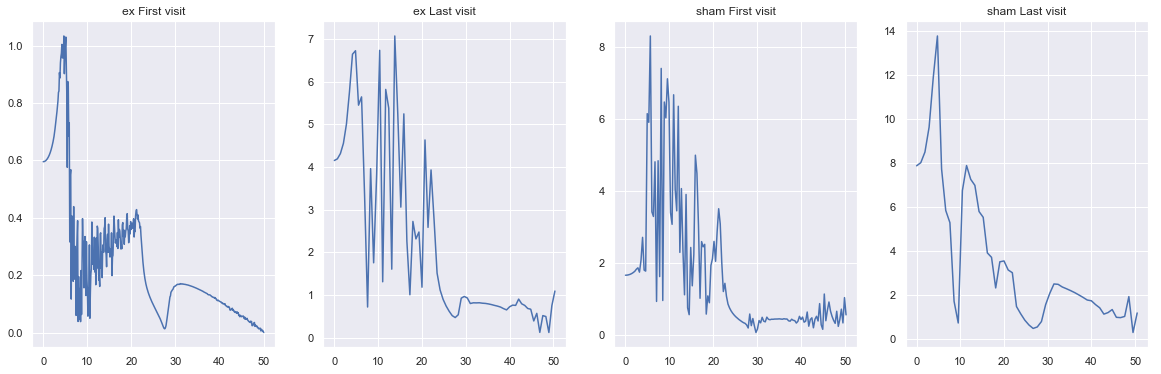

In [16]:
fig, ax = plt.subplots(1,4 , figsize = (20,6))
ax[0].plot(xf_first, 2.0/Nx_first * np.abs(fft_Cxvel_first[0:Nx_first//2]))
ax[0].set_title('ex First visit')
ax[1].plot(xf_last, 2.0/Nx_last * np.abs(fft_Cxvel_last[0:Nx_last//2]))
ax[1].set_title('ex Last visit')
ax[2].plot(xf_first_, 2.0/Nx_first_ * np.abs(fft_Cxvel_first_[0:Nx_first_//2]))
ax[2].set_title('sham First visit')
ax[3].plot(xf_last_, 2.0/Nx_last_ * np.abs(fft_Cxvel_last_[0:Nx_last_//2]))
ax[3].set_title('sham Last visit')
plt.show()   

sb.set()

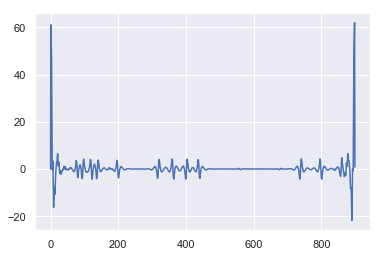

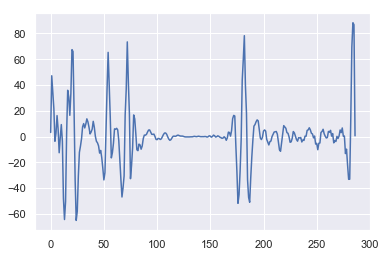

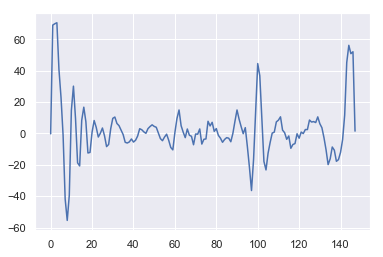

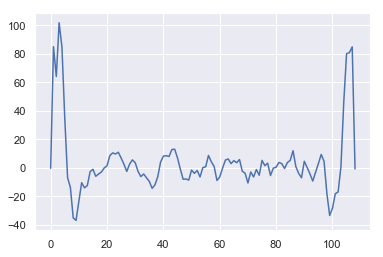

In [17]:
plt.plot(x_cond_first)
plt.show()
plt.plot(x_cond_first_)
plt.show()
plt.plot(x_cond_last)
plt.show()
plt.plot(x_cond_last_)
plt.show()

In [163]:
from scipy import signal

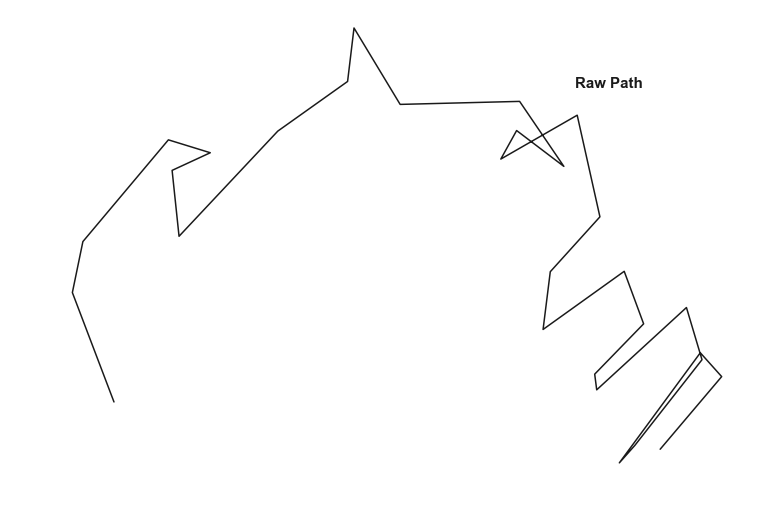

In [214]:
# plt.plot(WindData.X_position[0:20:] , WindData.Y_position[0:20:])
plt.show()
# plt.plot(WindData_.X_position[0:20:], WindData_.Y_position[0:20:])
plt.show()
x = signal.convolve(last_trial.X_position[20:50]*(2.5/74), gauss, mode='same', method = 'direct') / gauss.sum()
y = signal.convolve(last_trial.Y_position[20:50]*(2.5/74), gauss, mode='same', method = 'direct') / gauss.sum()
# plt.plot(x[1:-1], y[1:-1], linewidth=4.5, color = 'r')
plt.plot(last_trial.X_position[20:50]*(2.5/74), last_trial.Y_position[20:50]*(2.5/74), 'k')
gauss = signal.gaussian(3,3)
# plt.text(7,2.4, "Filtered Path",  weight = 'bold', color = 'r', size = 15)
plt.text(7,2.36, "Raw Path",  weight = 'bold', color = 'k', size = 15)
plt.savefig(r"C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\Figure\Methods\postionraw.png")

plt.show()
# plt.plot(last_trial_.X_position[0:20:], last_trial_.Y_position[0:20:])
plt.show()

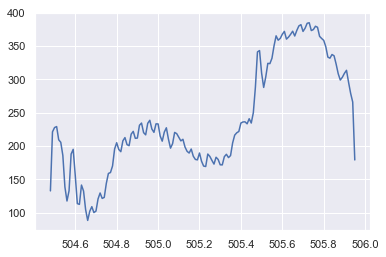

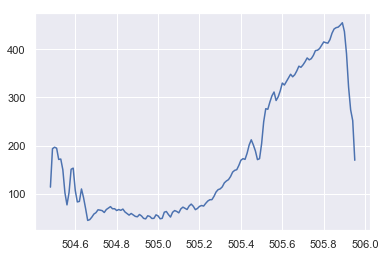

148

In [66]:
#  Assign the right column to the right number
pre_t = last_trial.loc[:,'FrameNumber']
t = pre_t/100
xvel = last_trial.loc[:,'X_position']
yvel = last_trial.loc[:,'Y_position']
# zvel = WindData.iloc[:,0]
# and then plot the time series
plt.plot(t,xvel)
plt.show()
plt.plot(t,yvel)
plt.show()
# plt.plot(t,zvel)
plt.show()
# sb.set()
len(pre_t)

In [67]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

In [68]:
pre_t_final = last_trial.loc[:,'FrameNumber']
t_final = pre_t_final/100
xvel_final = last_trial.loc[:,'X_position']
yvel_final = last_trial.loc[:,'Y_position']

In [69]:
t.values[-1]

505.95

In [70]:
Nx = len(xvel)  #number of points
Nt = Nx
Time = t.values[-1]-t.values[0]   #total sample time (in seconds)c
fs = Nx/Time   # sample frequency
TT = 1/fs  #delta t.
list(xvel)
meanxvel = mean(xvel)   # snag a mean and remove it from data to inspect fft
print(Nx,Time,fs)

148 1.4699999999999704 100.68027210884556


In [71]:
Nx_ = len(xvel_final)  #number of points
Nt_ = Nx_
Time_ = t_final.values[-1]-t_final.values[0]   #total sample time (in seconds)c
fs_ = Nx_/Time_   # sample frequency
TT_ = 1/fs_  #delta t.
list(xvel_final)
meanxvel_ = mean(xvel_final)   # snag a mean and remove it from data to inspect fft
print(Nx_,Time_,fs_)

148 1.4699999999999704 100.68027210884556


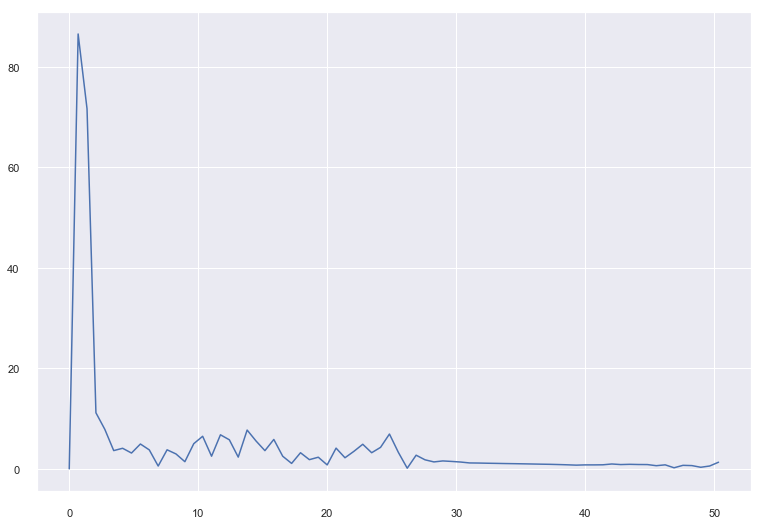

In [102]:
fftxvel = fft(xvel_final-meanxvel_)    # this is the Fourier tranform of the x velocity
   # . fftxvel is complex with real and imaginary part.
#Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  
plt.plot(xf, 2.0/Nx * np.abs(fftxvel[0:Nx//2]))
plt.savefig(r"C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\Figure\Methods\fft_raw.png")
plt.show()   
sb.set()

In [73]:
fftxvel_ = fft(xvel_final-meanxvel_)
xf_ = np.linspace(0.0, 1.0/(2.0*TT_), Nx_//2)

ValueError: x and y must have same first dimension, but have shapes (74,) and (148,)

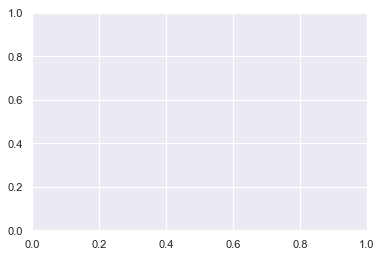

In [74]:
Nmax = 250  #just looking at the low frequencies (the first 100)
plt.plot(xf[0:Nmax], 2.0/Nx * np.abs(fftxvel[0:Nmax]))
# plt.plot(xf, 2.0/Nx * np.abs(fftxvel[0:Nx//2]))
plt.show()   
sb.set()

In [75]:
#  Here we implement a butterworth filter.  Kinda a useful beast for smoothing data.  
# . It is a high pass filter, bascially flattening your signal

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [76]:
cutoff = 5
order = 5
conditioned_xvel = butter_highpass_filter(xvel, cutoff, fs, order)
conditioned_xvel_final = butter_highpass_filter(xvel_final, cutoff, fs_, order)

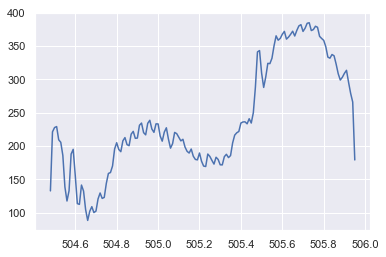

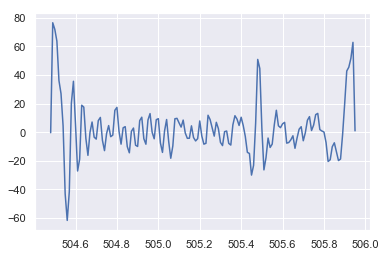

In [77]:
plt.plot(t,xvel)
plt.show()
plt.plot(t,conditioned_xvel)
plt.show()

In [78]:
#  Here we implement a butterworth filter.  Kinda a useful beast for smoothing data.  
# We are creating a bandstop filter to get rid of wing beat frequesicies.

def butter_bandstop(fs, order=5):
    nyq = 0.5 * fs
    low = 22 / nyq
    high = 28 / nyq
    b, a = butter(order, [low, high], btype='bandstop', analog=False)
    return b, a

def butter_bandstop_filter(data, fs, order=5):
    b, a = butter_bandstop(fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [120]:
order = 5
again_conditioned_xvel = butter_bandstop_filter(xvel, fs, order)
again_ = butter_highpass_filter(again_conditioned_xvel, 1, fs, order)
again_conditioned_xvel_final = butter_bandstop_filter(xvel_final, fs_, order)

In [135]:
xf[8]

5.516727238840852

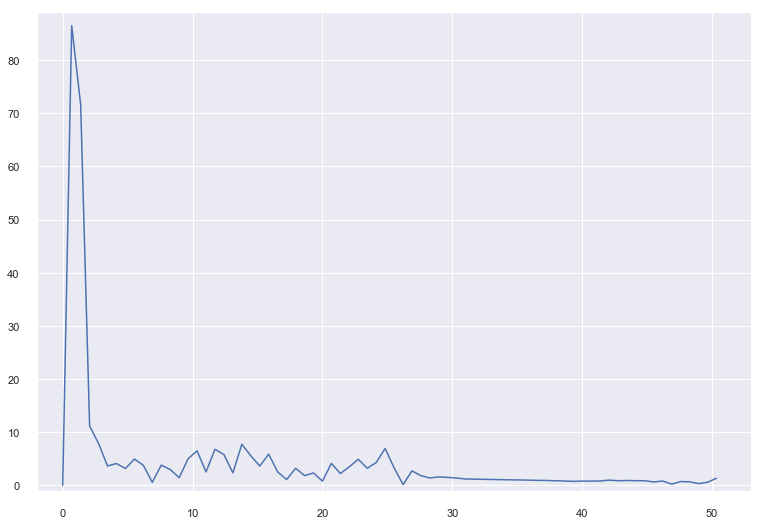

In [150]:
fftxvel = fft(xvel-meanxvel)    # this is the Fourier tranform of the x velocity
   # . fftxvel is complex with real and imaginary part.
#Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  
plt.plot(xf, 2.0/Nx * np.abs(fftxvel[0:Nx//2]))
plt.ylim(-1,89)
plt.xlim(-2,53)
plt.savefig(r"C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\Figure\Methods\fft_raw.png")
plt.show()   
sb.set()

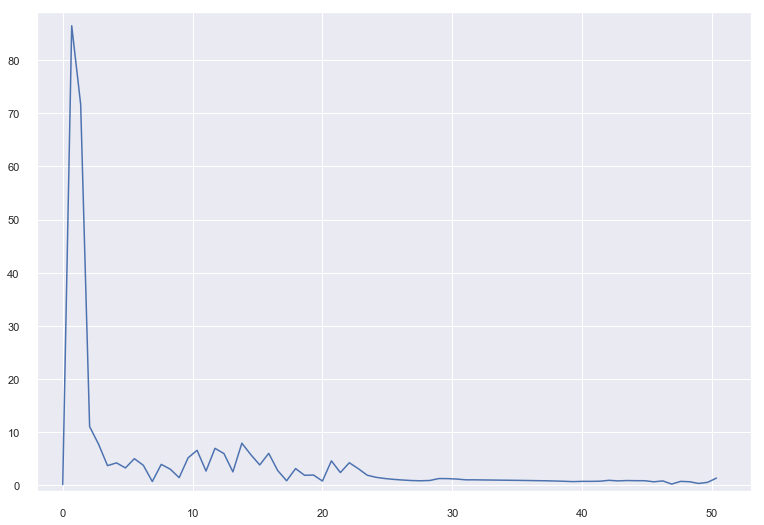

In [151]:
fftxvel = fft(again_conditioned_xvel-meanxvel)    # this is the Fourier tranform of the x velocity
   # . fftxvel is complex with real and imaginary part.
#Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  
plt.plot(xf, 2.0/Nx * np.abs(fftxvel[0:Nx//2]))
plt.ylim(-1,89)
plt.xlim(-2,53)
plt.savefig(r"C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\Figure\Methods\fft_filtered.png")
plt.show()   
sb.set()

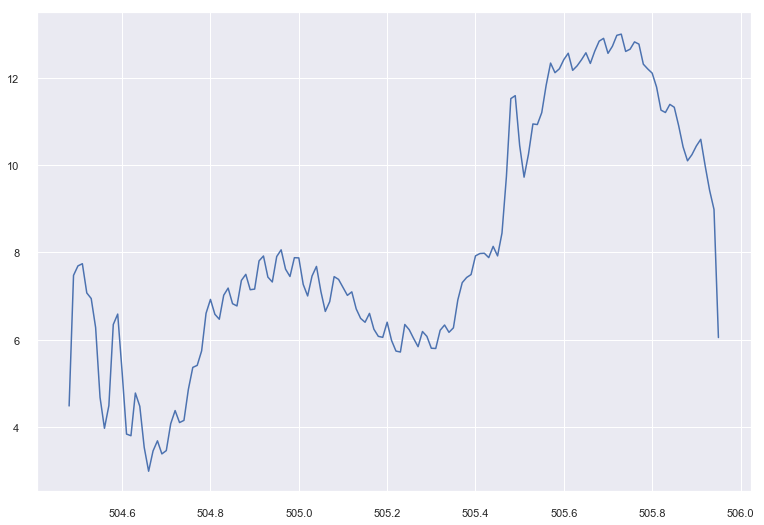

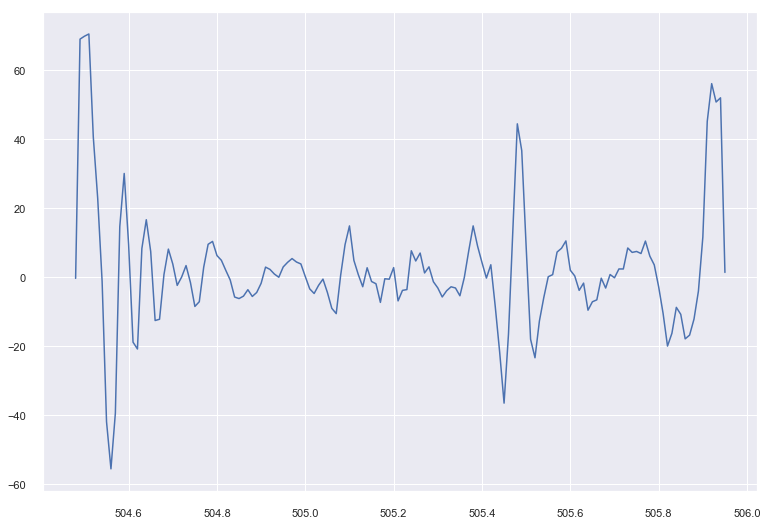

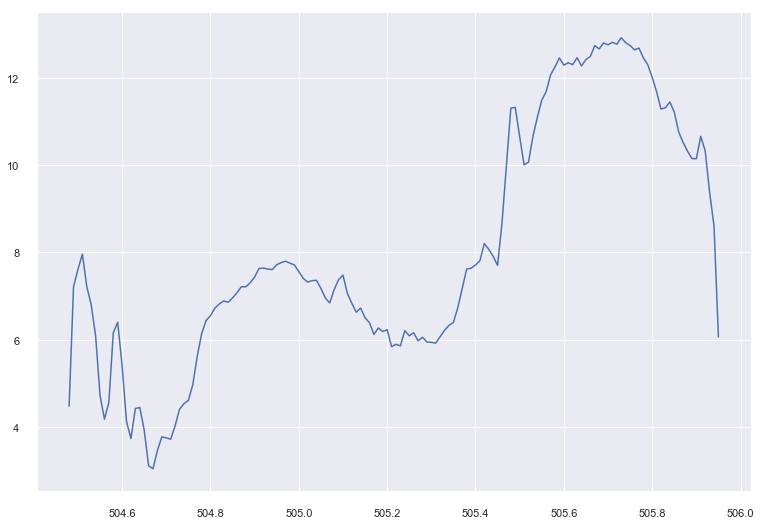

In [113]:
plt.plot(t,xvel*(2.5/74))
plt.ylim(75*(2.5/74),400*(2.5/74))
plt.savefig(r"C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\Figure\Methods\raw.png")
plt.show()
plt.plot(t,again_)
plt.show()
plt.plot(t,again_conditioned_xvel*(2.5/74))
plt.ylim(75*(2.5/74),400*(2.5/74))
plt.savefig(r"C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\Figure\Methods\filtered.png")
plt.show()


In [117]:
#with the data filtered to remove low frequency, we can compute a reasonable estimate 
# of u' using the standard deviation from the mean.  It's value strongly depends on the filter cutoff.
stdxv = np.std(again_conditioned_xvel)
meanxv = np.mean(xvel)
turb_intens = stdxv/meanxv
print(meanxv,stdxv,turb_intens)

367.7309840996992 91.00891892488782 0.24748776377302353


In [118]:
stdxv_ = np.std(again_conditioned_xvel_final)
meanxv_ = np.mean(xvel_final)
turb_intens_ = stdxv_/meanxv_
print(meanxv_,stdxv_,turb_intens_)

418.2203182374541 69.06433017615457 0.16513862948414124


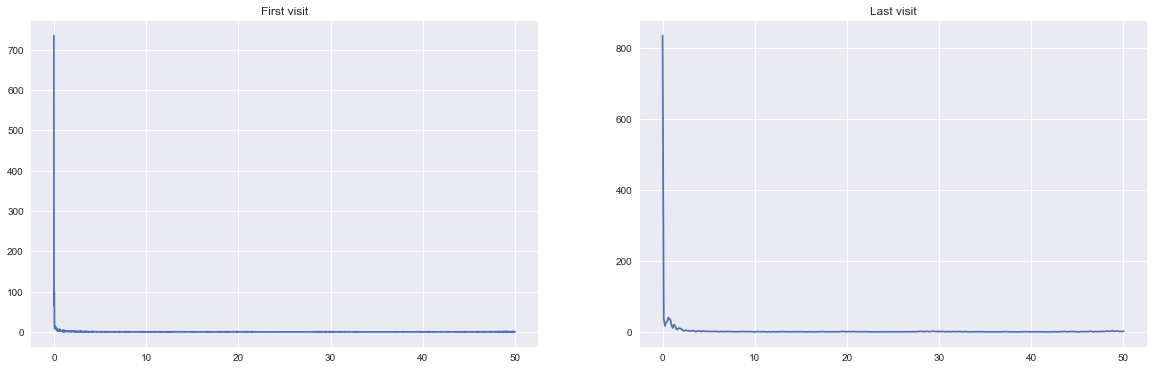

In [97]:
fft_Cxvel = fft(again_conditioned_xvel) # this is the Fourier tranform of the  filtered x-velocity
fft_Cxvel_ = fft(again_conditioned_xvel_final) 

#  just showing that the cut-off frequency makes sense
#Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  
xf_ = np.linspace(0.0, 1.0/(2.0*TT_), Nx_//2)
fig, ax = plt.subplots(1,2 , figsize = (20,6))
ax[0].plot(xf, 2.0/Nx * np.abs(fft_Cxvel[0:Nx//2]))
ax[0].set_title('First visit')
ax[1].plot(xf_, 2.0/Nx_ * np.abs(fft_Cxvel_[0:Nx_//2]))
ax[1].set_title('Last visit')
plt.show()   
sb.set()

In [55]:
start = [53, 60]
end = [4700, 876]
i = 0
for element in csv_list:
    trial_data = pd.read_csv(outpath + element)
    
    pre_t = trial_data.loc[start[i]:end[i],'FrameNumber']
    t = pre_t/100
    xvel = trial_data.loc[start[i]:end[i],'X_position']
    yvel = trial_data.loc[start[i]:end[i],'Y_position']
    
    Nx = len(xvel)  #number of points
    Nt = Nx
    Time = t[end[i]]-t[start[i]]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
    list(xvel)
    meanxvel = mean(xvel)
    
    i += 1

360.6263113722199

In [78]:
35115, 39768

array([nan +0.j, nan+nanj, nan+nanj, ..., nan+nanj, nan+nanj, nan+nanj])